## Reading DataSet

In [175]:
import pandas as pd
import numpy as np

In [176]:
df = pd.read_csv("Reddit_Data.csv")

In [177]:
df = pd.DataFrame(df)
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [178]:
# cleaning data set
df = df.dropna(axis =0)
df["category"].value_counts()

category
 1    15830
 0    13042
-1     8277
Name: count, dtype: int64

In [179]:
df = df.drop_duplicates()

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36799 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36799 non-null  object
 1   category       36799 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 862.5+ KB


In [181]:
df.round()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [182]:
df["clean_comment"] = df["clean_comment"].str.lower()

## PreProccessing

In [183]:
import nltk

### Tokenization

In [184]:
def tokenization (sentence) -> list :
    tokens = nltk.word_tokenize(sentence)
    return tokens

### Stop Words Removal

In [185]:
from nltk.corpus import stopwords

In [186]:
len(stopwords.words("english"))

179

In [187]:
def stop_word_remove (tokens : list ) -> list :
    a = []
    for token in tokens :
        if token not in stopwords.words("english"):
            a.append(token ) 
    return a

### Punctuation Removal

In [188]:
def punctuation_removal ( tokens : list ) -> list:
    punctuation = [".",",","/","'","?","\"","-","_",";",":","&","$","!","@","#","%","*","(",")"]
    a = []
    for token in tokens:
        if token not in punctuation:
            a.append(token)
    return a

### Stemming & Lemmitization

In [189]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [190]:
def stem_lemma ( tokens : list ) :
    lemmas = []
    for token in tokens: 
        lemmas.append(wnl.lemmatize(token))
    return " ".join(lemmas)

### Transformation

In [191]:
def PreProcessing (sentence):
    tokenized_sent = tokenization(sentence)
    filtered_sent = stop_word_remove(tokenized_sent)
    lemmatized_sent = stem_lemma(filtered_sent)
    return lemmatized_sent

In [192]:
df["transformation"] = df["clean_comment"].apply(lambda x : PreProcessing(x))

In [193]:
df["transformation_len"] = df["transformation"].apply(lambda x: len(x.split()))

In [194]:
df.head()

,clean_comment,category,transformation,transformation_len
0,family mormon have never tried explain them t...,1,family mormon never tried explain still stare ...,26
1,buddhism has very much lot compatible with chr...,1,buddhism much lot compatible christianity espe...,137
2,seriously don say thing first all they won get...,-1,seriously say thing first get complex explain ...,46
3,what you have learned yours and only yours wha...,0,learned want teach different focus goal wrappi...,14
4,for your own benefit you may want read living ...,1,benefit may want read living buddha living chr...,67


In [195]:
df.corr(numeric_only=True, method="spearman")

,category,transformation_len
category,1.000000,0.156775
transformation_len,0.156775,1.000000


In [196]:
negative_comments = df[df["category"] == - 1]["transformation"].tolist()
positive_comments = df[df["category"] ==   1]["transformation"].tolist()
neutral_comments = df[df["category"] ==   0]["transformation"].tolist()

In [197]:
negative_comments = " ".join(negative_comments).split()
positive_comments = " ".join(positive_comments).split()
neutral_comments = " ".join(neutral_comments).split()

In [198]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(background_color="white")

In [199]:
# for negative comments

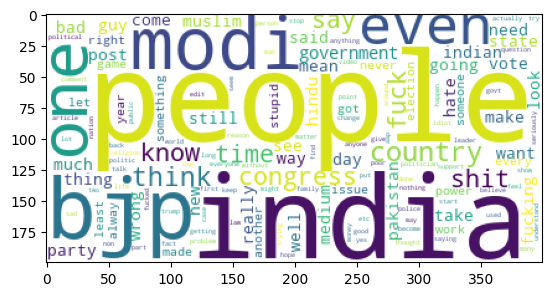

In [200]:
plt.imshow(wc.generate(" ".join(negative_comments)))

In [201]:
# for positive comments

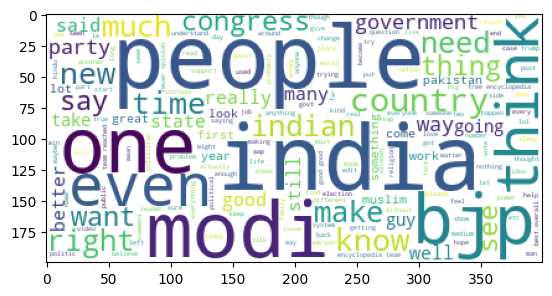

In [202]:
plt.imshow(wc.generate(" ".join(positive_comments)))

In [203]:
# for neutral comments

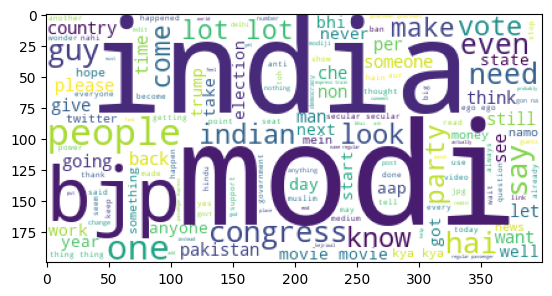

In [204]:
plt.imshow(wc.generate(" ".join(neutral_comments)))

In [205]:
# there are lot of words which are common in all the categories

### Removing Words similar in all categories

In [206]:
from collections import Counter

In [207]:
pos_comm = Counter(positive_comments)
neg_comm = Counter(negative_comments)
neu_comm = Counter(neutral_comments)

In [208]:
all_common = (neu_comm & pos_comm & neu_comm).most_common(100)

In [209]:
new_stopwords = (pos_comm & neg_comm).most_common(100)
new_stopwords = new_stopwords + all_common

In [210]:
print (len (new_stopwords))

200


In [211]:
new_stopwords =[new_stopwords[x][0] for x in range(len(new_stopwords))]

In [212]:
new_stopwords

['people',
 'bjp',
 'like',
 'india',
 'modi',
 'one',
 'get',
 'even',
 'would',
 'time',
 'indian',
 'thing',
 'congress',
 'country',
 'party',
 'government',
 'know',
 '’',
 'think',
 'year',
 'also',
 'say',
 'muslim',
 'medium',
 'make',
 'see',
 'state',
 'way',
 'said',
 'day',
 'guy',
 'need',
 'news',
 'going',
 'want',
 'vote',
 'shit',
 'come',
 'pakistan',
 'hindu',
 'right',
 'still',
 'much',
 'mean',
 'take',
 'election',
 'every',
 'well',
 'really',
 'look',
 'power',
 'lot',
 'post',
 'back',
 'never',
 'money',
 'someone',
 'political',
 'something',
 'bad',
 'work',
 'good',
 'wrong',
 'anything',
 'give',
 'got',
 'long',
 'could',
 'issue',
 'least',
 'game',
 'leader',
 'minister',
 'anti',
 'case',
 'let',
 'man',
 'fuck',
 'life',
 'question',
 'made',
 'support',
 'everyone',
 'always',
 'etc',
 'non',
 'religion',
 'another',
 '“',
 'actually',
 'article',
 'problem',
 'politician',
 '”',
 'govt',
 'aap',
 'trump',
 'nothing',
 'world',
 'without',
 'modi',


In [213]:
import pickle
with open("stopwords","wb") as file_ :
    pickle.dump(new_stopwords,file_)
file_.close()

In [214]:
def check_new_stopwords(sentence : str, sw = new_stopwords) -> str:
    words = sentence.split()
    length = len(words)
    remove_idx =[]
    for i in range(length):
        if words[i] in sw:
            remove_idx.append(i)
    remove_idx = sorted(remove_idx,reverse = True)
    for i in remove_idx:
        words.pop(i)
    return " ".join(words)

In [215]:
df["new_transformed"] = df["transformation"].apply(lambda x : check_new_stopwords(x))

In [216]:
df.head()

,clean_comment,category,transformation,transformation_len,new_transformed
0,family mormon have never tried explain them t...,1,family mormon never tried explain still stare ...,26,family mormon tried explain stare puzzled kind...
1,buddhism has very much lot compatible with chr...,1,buddhism much lot compatible christianity espe...,137,buddhism compatible christianity especially co...
2,seriously don say thing first all they won get...,-1,seriously say thing first get complex explain ...,46,seriously first complex explain normal anyway ...
3,what you have learned yours and only yours wha...,0,learned want teach different focus goal wrappi...,14,learned teach different focus goal wrapping pa...
4,for your own benefit you may want read living ...,1,benefit may want read living buddha living chr...,67,benefit may read living buddha living christ t...


In [217]:
df["new_len"] = df["new_transformed"].apply(lambda x: len(x.split()))

In [218]:
df.head()

,clean_comment,category,transformation,transformation_len,new_transformed,new_len
0,family mormon have never tried explain them t...,1,family mormon never tried explain still stare ...,26,family mormon tried explain stare puzzled kind...,19
1,buddhism has very much lot compatible with chr...,1,buddhism much lot compatible christianity espe...,137,buddhism compatible christianity especially co...,101
2,seriously don say thing first all they won get...,-1,seriously say thing first get complex explain ...,46,seriously first complex explain normal anyway ...,33
3,what you have learned yours and only yours wha...,0,learned want teach different focus goal wrappi...,14,learned teach different focus goal wrapping pa...,12
4,for your own benefit you may want read living ...,1,benefit may want read living buddha living chr...,67,benefit may read living buddha living christ t...,58


### Word Embedding

In [219]:
from gensim.models import Word2Vec

In [220]:
pre_text = df["new_transformed"].apply(lambda x: x.split()).tolist()

In [221]:
n_dim = 32

In [222]:
vectors = Word2Vec(
    pre_text,
    min_count = 200,
    sg = 1,
    window=5,
    vector_size=n_dim
)

In [223]:
emb_df = (
    pd.DataFrame(
        [vectors.wv.get_vector(str(n)) for n in vectors.wv.key_to_index],
        index = vectors.wv.key_to_index
    )
)

In [224]:
emb_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
many,-0.116992,-0.196318,-0.241174,0.149873,0.284498,0.002358,-0.140211,0.469322,0.026592,-0.297243,...,0.262709,-0.207164,0.131835,0.300015,-0.077176,0.189600,0.171558,-0.142119,-0.214036,0.008600
better,-0.395358,-0.613065,0.019085,0.045310,0.038682,-0.092890,-0.051632,0.316390,-0.069760,-0.110385,...,0.218228,-0.311653,0.046321,0.139650,0.015503,0.278648,0.145094,-0.402958,-0.332812,-0.041302
new,-0.093537,-0.514369,-0.488117,0.298884,0.366286,0.408474,-0.023363,0.738115,-0.152394,-0.280901,...,0.180160,-0.401239,-0.314847,-0.350857,-0.291972,0.001597,-0.024932,-0.289050,0.424954,-0.443508
best,-0.151633,-0.595345,-0.197725,-0.213464,-0.668390,-0.387150,-0.023996,0.230184,0.411122,0.232989,...,0.614087,-0.718768,0.383102,0.242303,0.357164,0.562176,-0.074315,0.530274,0.231189,-0.591707
first,-0.120561,-0.487615,-0.218391,0.269259,0.482351,-0.285665,-0.145359,-0.123380,0.227366,-0.103518,...,0.074684,-0.003563,0.030395,0.426790,-0.340618,0.464574,0.471021,-0.063938,0.033898,-0.255671


In [225]:
emb_df.index

Index(['many', 'better', 'new', 'best', 'first', 'free', 'point', 'may',
       'great', 'feel',
       ...
       'voice', 'following', 'military', 'cell', 'america', 'white',
       'supposed', 'journalist', 'bhakts', 'related'],
      dtype='object', length=505)

In [226]:
emb_df_trans = emb_df.transpose()
emb_df_trans.head()

,many,better,new,best,first,free,point,may,great,feel,...,voice,following,military,cell,america,white,supposed,journalist,bhakts,related
0,-0.116992,-0.395358,-0.093537,-0.151633,-0.120561,-0.184754,-0.415978,0.090969,-0.173573,-0.522006,...,-0.546382,0.187538,0.162618,0.268296,-0.371958,-0.138829,0.423764,0.490931,0.116810,0.435321
1,-0.196318,-0.613065,-0.514369,-0.595345,-0.487615,-0.428927,-0.626036,-0.305247,-0.599173,-0.205546,...,-0.994234,-0.080471,-0.360884,0.027920,-0.524379,-0.437965,-0.394936,-0.234371,-0.055913,-0.597328
2,-0.241174,0.019085,-0.488117,-0.197725,-0.218391,-0.149904,-0.004112,-0.077758,-0.120009,0.058359,...,0.338967,-0.169966,-0.398687,-0.037569,-0.170456,-0.366281,-0.002700,0.032341,0.447213,0.205836
3,0.149873,0.045310,0.298884,-0.213464,0.269259,-0.458036,0.061482,-0.102530,0.061477,0.024372,...,0.497664,-0.223724,0.429544,0.590048,0.456084,0.515189,0.186894,0.382109,0.221437,-0.148730
4,0.284498,0.038682,0.366286,-0.668390,0.482351,0.238297,0.272455,-0.111616,0.335433,0.367490,...,-0.081233,0.353464,0.618174,0.200172,0.867078,0.960844,0.462932,0.254598,0.283093,0.085318


In [227]:
def has_vector (sentence : str ) :
    res = []
    for word in sentence.split():
        if word in emb_df.index:
            res.append(word)
    return res

In [228]:
def get_vector (word : str) :
    global n_dim
    word_vector = np.array(emb_df_trans[word])
    word_vector = np.reshape(word_vector,(1,n_dim))
    return word_vector

In [229]:
def WordEmbedding (sentence : str):
    global  n_dim
    filtered_sent = has_vector(sentence)
    
    sent_vector = np.zeros((1,n_dim))
    for word in filtered_sent :
        word_vector = get_vector(word)
        sent_vector = np.concatenate((sent_vector,word_vector) , axis=0)
    
    sent_vector = np.delete(sent_vector, (0), axis =0)

    # if check < max_len:
    #     zero_vector = np.zeros((max_len - check, n_dim))
    #     sent_vector = np.concatenate((sent_vector,zero_vector), axis = 0)
    
    return sent_vector

### Final Preprocessing

In [230]:
df["transformation_vectors"] = df["new_transformed"].apply(lambda x : WordEmbedding(x))

In [231]:
df.dropna()
df.head()

,clean_comment,category,transformation,transformation_len,new_transformed,new_len,transformation_vectors
0,family mormon have never tried explain them t...,1,family mormon never tried explain still stare ...,26,family mormon tried explain stare puzzled kind...,19,"[[0.38741376996040344, -0.3283511996269226, -0..."
1,buddhism has very much lot compatible with chr...,1,buddhism much lot compatible christianity espe...,137,buddhism compatible christianity especially co...,101,"[[-0.17153407633304596, -0.3695440888404846, -..."
2,seriously don say thing first all they won get...,-1,seriously say thing first get complex explain ...,46,seriously first complex explain normal anyway ...,33,"[[-0.26152071356773376, -0.40541350841522217, ..."
3,what you have learned yours and only yours wha...,0,learned want teach different focus goal wrappi...,14,learned teach different focus goal wrapping pa...,12,"[[-0.30422505736351013, -0.3570026755332947, 0..."
4,for your own benefit you may want read living ...,1,benefit may want read living buddha living chr...,67,benefit may read living buddha living christ t...,58,"[[-0.11690168082714081, -0.10132842510938644, ..."


In [232]:
df["vector_len"] = df["transformation_vectors"].apply(lambda x: x.shape[0])
df.head()

,clean_comment,category,transformation,transformation_len,new_transformed,new_len,transformation_vectors,vector_len
0,family mormon have never tried explain them t...,1,family mormon never tried explain still stare ...,26,family mormon tried explain stare puzzled kind...,19,"[[0.38741376996040344, -0.3283511996269226, -0...",3
1,buddhism has very much lot compatible with chr...,1,buddhism much lot compatible christianity espe...,137,buddhism compatible christianity especially co...,101,"[[-0.17153407633304596, -0.3695440888404846, -...",33
2,seriously don say thing first all they won get...,-1,seriously say thing first get complex explain ...,46,seriously first complex explain normal anyway ...,33,"[[-0.26152071356773376, -0.40541350841522217, ...",15
3,what you have learned yours and only yours wha...,0,learned want teach different focus goal wrappi...,14,learned teach different focus goal wrapping pa...,12,"[[-0.30422505736351013, -0.3570026755332947, 0...",3
4,for your own benefit you may want read living ...,1,benefit may want read living buddha living chr...,67,benefit may read living buddha living christ t...,58,"[[-0.11690168082714081, -0.10132842510938644, ...",21


In [233]:
df["vector_len"]

0         3
1        33
2        15
3         3
4        21
         ..
37244     0
37245     3
37246     0
37247     1
37248     2
Name: vector_len, Length: 36799, dtype: int64

In [234]:
padded_len = df["vector_len"].mean()
padded_len = int(padded_len.round())
padded_len

5

##### Padding

In [235]:
def padding (vector, length = padded_len):
    if (vector.shape[0] < padded_len):
        zero_vector = np.zeros(  ( (padded_len - vector.shape[0]), n_dim) )
        vector = np.concatenate((vector, zero_vector), axis = 0)
        return vector
    
    elif (vector.shape[0]> padded_len):
        n = vector.shape[0] - padded_len
        for i in range(n):
            vector = np.delete(vector, (vector.shape[0]-1), axis =0)
    
    return vector

In [236]:
df["padded_vector"] = df["transformation_vectors"].apply(lambda x : padding(x))

In [237]:
df["padded_vector_len"] = df["padded_vector"].apply(len)

In [238]:
df.head()

,clean_comment,category,transformation,transformation_len,new_transformed,new_len,transformation_vectors,vector_len,padded_vector,padded_vector_len
0,family mormon have never tried explain them t...,1,family mormon never tried explain still stare ...,26,family mormon tried explain stare puzzled kind...,19,"[[0.38741376996040344, -0.3283511996269226, -0...",3,"[[0.38741376996040344, -0.3283511996269226, -0...",5
1,buddhism has very much lot compatible with chr...,1,buddhism much lot compatible christianity espe...,137,buddhism compatible christianity especially co...,101,"[[-0.17153407633304596, -0.3695440888404846, -...",33,"[[-0.17153407633304596, -0.3695440888404846, -...",5
2,seriously don say thing first all they won get...,-1,seriously say thing first get complex explain ...,46,seriously first complex explain normal anyway ...,33,"[[-0.26152071356773376, -0.40541350841522217, ...",15,"[[-0.26152071356773376, -0.40541350841522217, ...",5
3,what you have learned yours and only yours wha...,0,learned want teach different focus goal wrappi...,14,learned teach different focus goal wrapping pa...,12,"[[-0.30422505736351013, -0.3570026755332947, 0...",3,"[[-0.30422505736351013, -0.3570026755332947, 0...",5
4,for your own benefit you may want read living ...,1,benefit may want read living buddha living chr...,67,benefit may read living buddha living christ t...,58,"[[-0.11690168082714081, -0.10132842510938644, ...",21,"[[-0.11690168082714081, -0.10132842510938644, ...",5


In [239]:
with open ("transformation_df","wb") as file_:
    pickle.dump(df,file_)
file_.close()

In [240]:
new_positive_comm = " ".join(df[df["category"] == 1]["new_transformed"].tolist())
new_negative_comm = " ".join(df[df["category"] == -1]["new_transformed"].tolist())
new_neutral_comm = " ".join(df[df["category"] == 0]["new_transformed"].tolist())

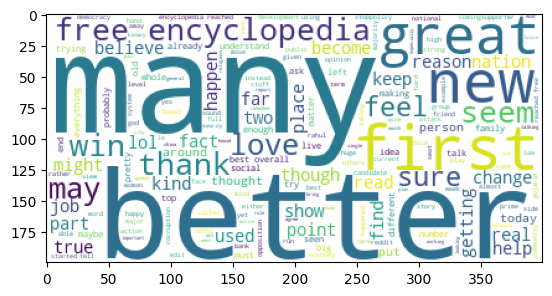

In [241]:
plt.imshow(wc.generate(new_positive_comm))

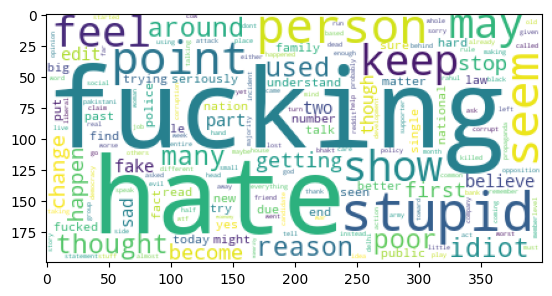

In [242]:
plt.imshow(wc.generate(new_negative_comm))

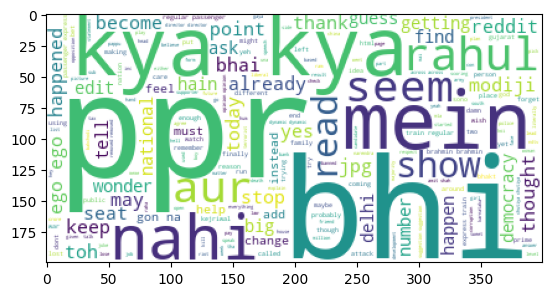

In [243]:
plt.imshow(wc.generate(new_neutral_comm))

## Spliting Training and Test Set

In [244]:
X = np.array(df["padded_vector"].tolist())
X.shape

(36799, 5, 32)

In [245]:
y = np.array(df["category"].tolist())
y.shape

(36799,)

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 42)

In [248]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(25759, 5, 32)
(25759,)
(11040, 5, 32)
(11040,)


In [249]:
data = [X_train,y_train,X_test,y_test]
with open ("training" , "wb") as file_:
    pickle.dump(data,file_)
file_.close()

# Building NN Model

In [250]:
Y_train = np.zeros( (len(y_train),3) )
Y_test = np.zeros( (len(y_test),3) )

In [251]:
for i in range(len(y_train)):
    idx = y_train[i]
    Y_train[i][idx] = 1

for i in range(len(y_test)):
    idx = y_test[i]
    Y_test[i][idx] = 1

In [252]:
import tensorflow as tf

In [253]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.layers import Bidirectional

In [254]:
X_train = tf.convert_to_tensor(X_train, tf.float32)
X_test = tf.convert_to_tensor(X_test, tf.float32)

Y_train = tf.convert_to_tensor(Y_train, tf.float32)
Y_test = tf.convert_to_tensor(Y_test, tf.float32)

In [255]:
SGD_ = tf.keras.optimizers.legacy.SGD(
    learning_rate= 0.1
)

In [256]:
import keras_tuner as kt

In [257]:
def build_model (hp):
    model = Sequential()
    
    units_1 = hp.Int("units_1", min_value = 32, max_value = 64, step = 4)
    units_2 = hp.Int("units_2", min_value = 8, max_value = 16, step = 2)
    
    model.add(SimpleRNN(units_1, input_shape = (5,32),return_sequences = False, activation= "tanh"))
    Dropout(0.3)
    
    model.add(Dense(units_2))

    Dropout(0.2)
    
    model.add(Dense(3,activation = "softmax"))
    
    model.compile(optimizer = SGD_, loss = "categorical_crossentropy", metrics =["accuracy"])
    
    return model

In [258]:
tuner = kt.RandomSearch (
    build_model,
    objective= "val_accuracy",
    max_trials=20,
    directory = "trial",
)

INFO:tensorflow:Reloading Tuner from trial\untitled_project\tuner0.json


In [259]:
tuner.search(X_train, Y_train, validation_data = (X_test, Y_test))

INFO:tensorflow:Oracle triggered exit


In [260]:
tuner.get_best_hyperparameters()[0].values

{'units_1': 48, 'units_2': 12}

In [261]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 48)                3888      
                                                                 
 dense (Dense)               (None, 12)                588       
                                                                 
 dense_1 (Dense)             (None, 3)                 39        
                                                                 
Total params: 4515 (17.64 KB)
Trainable params: 4515 (17.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [262]:
model.fit(X_train,Y_train, initial_epoch = 1, epochs = 100, validation_data = (X_train, Y_train) )

Epoch 2/100
805/805 [==============================] - 3s 4ms/step - loss: 0.8889 - accuracy: 0.5944 - val_loss: 0.8764 - val_accuracy: 0.6012
Epoch 3/100
805/805 [==============================] - 3s 3ms/step - loss: 0.8799 - accuracy: 0.5999 - val_loss: 0.8769 - val_accuracy: 0.6026
Epoch 4/100
805/805 [==============================] - 3s 4ms/step - loss: 0.8728 - accuracy: 0.6079 - val_loss: 0.8597 - val_accuracy: 0.6139
Epoch 5/100
805/805 [==============================] - 3s 3ms/step - loss: 0.8647 - accuracy: 0.6122 - val_loss: 0.8712 - val_accuracy: 0.6114
Epoch 6/100
805/805 [==============================] - 3s 3ms/step - loss: 0.8569 - accuracy: 0.6217 - val_loss: 0.8416 - val_accuracy: 0.6292
Epoch 7/100
805/805 [==============================] - 3s 3ms/step - loss: 0.8503 - accuracy: 0.6242 - val_loss: 0.8368 - val_accuracy: 0.6358
Epoch 8/100
805/805 [==============================] - 2s 3ms/step - loss: 0.8429 - accuracy: 0.6310 - val_loss: 0.8336 - val_accuracy: 0.6376

In [263]:
y_score = model.predict(X_test)
y_score

345/345 [==============================] - 1s 1ms/step


array([[0.6823781 , 0.09655811, 0.2210638 ],
       [0.44049343, 0.35649213, 0.20301442],
       [0.01968677, 0.87183607, 0.10847707],
       ...,
       [0.6489426 , 0.22878438, 0.12227306],
       [0.8259679 , 0.07576857, 0.09826351],
       [0.6489426 , 0.22878431, 0.1222731 ]], dtype=float32)

# Evaluation

In [264]:
score = model.evaluate(X_test, Y_test)

 74/345 [=====>........................] - ETA: 0s - loss: 0.9260 - accuracy: 0.5891

345/345 [==============================] - 0s 1ms/step - loss: 0.9258 - accuracy: 0.5941


In [265]:
print("test score: " , score[0])
print ("accuracy: " , score [1])

test score:  0.9257978200912476
accuracy:  0.5941123366355896


### ROC Curve

In [266]:
target_names = ["neutral", "positive", "negative"]
target_names = np.array(target_names)
target_names

array(['neutral', 'positive', 'negative'], dtype='<U8')

In [267]:
y_train_cat = []
for i in y_train:
    y_train_cat.append(target_names[i])

In [268]:
y_test_cat = []
for i in y_test:
    y_test_cat.append(target_names[i])

In [269]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train_cat)
y_onehot_test = label_binarizer.transform(y_test_cat)

In [270]:
print(y_onehot_test.shape)
y_onehot_test

(11040, 3)


array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [271]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

##### Neutral (OvR approach)

In [272]:
class_of_interest = "neutral"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

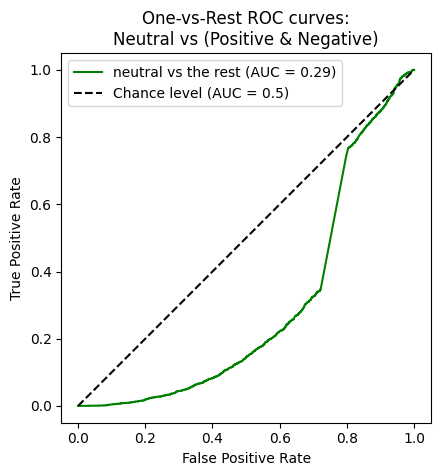

In [273]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="green",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nNeutral vs (Positive & Negative)")
plt.legend()
plt.show()

##### Positive (OvR approach)

In [274]:
class_of_interest = "positive"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

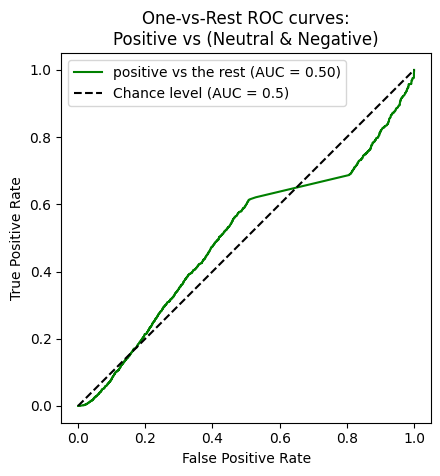

In [275]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="green",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nPositive vs (Neutral & Negative)")
plt.legend()
plt.show()

##### Negative (OvR approach)

In [276]:
class_of_interest = "negative"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

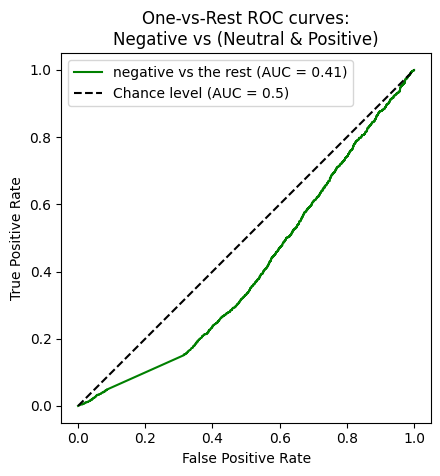

In [277]:
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="green",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nNegative vs (Neutral & Positive)")
plt.legend()
plt.show()

##### Neutral vs Positive (OvO approach)

In [278]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, accuracy_score

In [279]:
from itertools import combinations

pair_list = list(combinations(np.unique(target_names), 2))
print(pair_list)

[('negative', 'neutral'), ('negative', 'positive'), ('neutral', 'positive')]


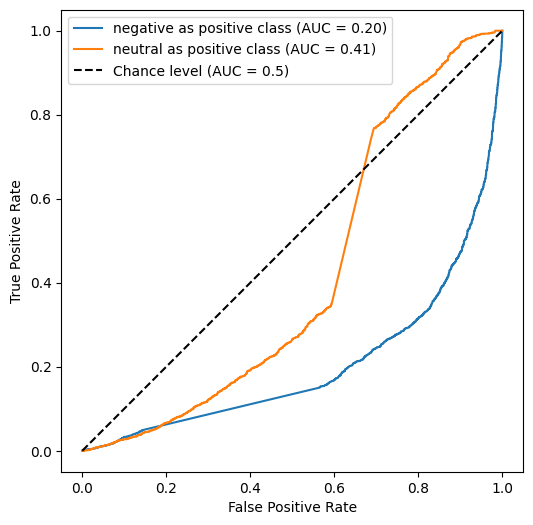

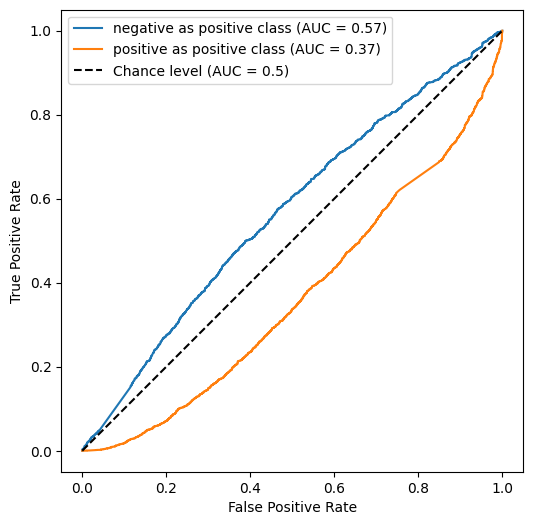

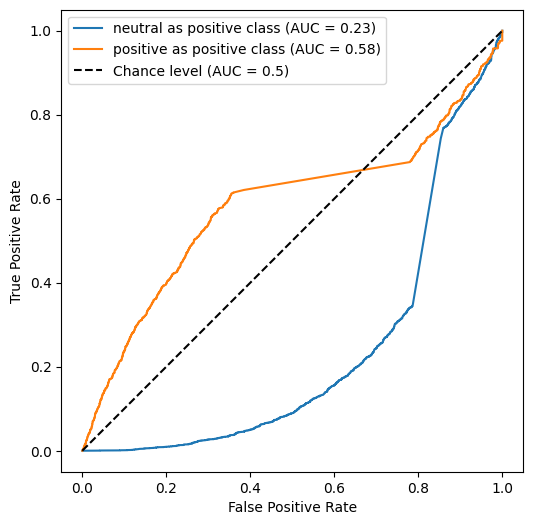

In [280]:
pair_scores = []
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = np.zeros((len(y_test_cat)),dtype= bool)
    for i in range(len(y_test_cat)):
        if y_test_cat[i] == label_a:
            a_mask[i] = True
        else:
            a_mask[i] = False
            
    b_mask = np.zeros((len(y_test_cat)),dtype= bool)
    for i in range(len(y_test_cat)):
        if y_test_cat[i] == label_b:
            b_mask[i] = True
        else:
            b_mask[i] = False
            
    ab_mask = np.zeros((len(y_test_cat)),dtype= bool)
    for i in range(len(y_test_cat)):
        if y_test_cat[i] == label_a or y_test_cat[i] == label_b :
            ab_mask[i] = True
        else:
            ab_mask[i] = False

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, y_score[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, y_score[ab_mask, idx_b])

    fig, ax = plt.subplots(figsize=(6, 6))
    RocCurveDisplay.from_predictions(
        a_true,
        y_score[ab_mask, idx_a],
        ax=ax,
        name=f"{label_a} as positive class",
    )
    RocCurveDisplay.from_predictions(
        b_true,
        y_score[ab_mask, idx_b],
        ax=ax,
        name=f"{label_b} as positive class",
        plot_chance_level=True,
    )
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # plt.title(f"{target_names[idx_a]} vs {label_b} ROC curves")
    plt.legend()
    plt.show()

In [281]:
pos_mask = np.zeros( (len(y_test_cat)) ,dtype= bool)
for i in range ( len(y_test_cat) ):
    if y_test_cat[i] == "positive":
        pos_mask[i] = True

neg_mask = np.zeros( (len(y_test_cat)) ,dtype= bool)
for i in range ( len(y_test_cat) ):
    if y_test_cat[i] == "negative":
        neg_mask[i] = True
        
neu_mask = np.zeros( (len(y_test_cat)) ,dtype= bool)
for i in range ( len(y_test_cat) ):
    if y_test_cat[i] == "neutral":
        neu_mask[i] = True

In [282]:
pos_neu_mask = np.zeros( (len(y_test_cat)) ,dtype= bool)
for i in range ( len(y_test_cat) ):
    if y_test_cat[i] == "neutral" or y_test_cat[i] == "positive":
        pos_neu_mask[i] = True

pos_neg_mask = np.zeros( (len(y_test_cat)) ,dtype= bool)
for i in range ( len(y_test_cat) ):
    if y_test_cat[i] == "negative" or y_test_cat[i] == "positive":
        pos_neg_mask[i] = True

neg_neu_mask = np.zeros( (len(y_test_cat)) ,dtype= bool)
for i in range ( len(y_test_cat) ):
    if y_test_cat[i] == "negative" or y_test_cat[i] == "neutral":
        neg_neu_mask[i] = True

##### selecting threshold : neutral - positive

In [283]:
# pos_true = pos_mask[pos_neu_mask]
# idx_pos = np.flatnonzero(label_binarizer.classes_ == "positive")[0]
# fpr_pos, tpr_pos, threshold_neu_pos = roc_curve(pos_true, y_score[pos_neu_mask, idx_pos])

In [284]:
# fig, ax = plt.subplots(figsize=(6, 6))
# RocCurveDisplay.from_predictions(
#     pos_true,
#     y_score[pos_neu_mask, idx_pos],
#     ax=ax,
#     name="Positve as positive class",
# )
# plt.axis("square")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.legend()
# plt.show()

In [285]:
# threshold_neu_pos

In [286]:
# accuracy_ls = []
# for thres in threshold_neu_pos:
    # y_pred_temp = np.where(y_score> thres,1,0 )
    # accuracy_ls.append(accuracy_score(y_test,y_pred_temp))
# print(accuracy_ls)
    

In [287]:
y_score

array([[0.6823781 , 0.09655811, 0.2210638 ],
       [0.44049343, 0.35649213, 0.20301442],
       [0.01968677, 0.87183607, 0.10847707],
       ...,
       [0.6489426 , 0.22878438, 0.12227306],
       [0.8259679 , 0.07576857, 0.09826351],
       [0.6489426 , 0.22878431, 0.1222731 ]], dtype=float32)

In [288]:
y_score_final_cat = []
for i in range(len(y_score)):
    a = y_score[i][0]
    b = y_score[i][1]
    c = y_score[i][-1]
    if a>b and a>c :
        y_score_final_cat.append(0)
    elif b>a and b>c :
        y_score_final_cat.append(1)
    elif c>a and c>b :
        y_score_final_cat.append(-1)

In [289]:
from sklearn.metrics import classification_report , confusion_matrix

In [290]:
cm = confusion_matrix(
    y_test,
    y_score_final_cat
)
cm

array([[ 944,  639,  838],
       [ 397, 2771,  650],
       [1041,  916, 2844]], dtype=int64)

In [291]:
cr= classification_report(
    y_test,
    y_score_final_cat
)
print(cr)

              precision    recall  f1-score   support

          -1       0.40      0.39      0.39      2421
           0       0.64      0.73      0.68      3818
           1       0.66      0.59      0.62      4801

    accuracy                           0.59     11040
   macro avg       0.56      0.57      0.57     11040
weighted avg       0.59      0.59      0.59     11040

